In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

# Prática - CIFAR 10

#### 1. Aquisição dos dados


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


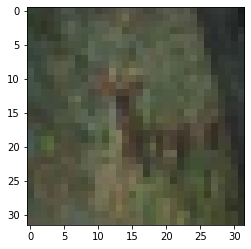

In [4]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image)
plt.show()

#### 2. Pré-processamento

#### Normalização

In [5]:
np.max(x_train)

255

In [6]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### One hot encoder na variável alvo

In [7]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()


y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

#### 3. Particionamento de base de dados

In [8]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [9]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [10]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(240, input_dim = 1024))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.3))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

In [11]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [12]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 50, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 2.0270 - accuracy: 0.2558 - val_loss: 1.8428 - val_accuracy: 0.3450
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 1.9239 - accuracy: 0.2905 - val_loss: 1.7893 - val_accuracy: 0.3613
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8949 - accuracy: 0.3032 - val_loss: 1.7704 - val_accuracy: 0.3694
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8697 - accuracy: 0.3142 - val_loss: 1.7438 - val_accuracy: 0.3786
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8596 - accuracy: 0.3234 - val_loss: 1.7487 - val_accuracy: 0.3727
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8509 - accuracy: 0.3275 - val_loss: 1.7744 - val_accuracy: 0.3729
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8308 - accuracy: 0.3333 - val_loss: 1.7516 - val_accuracy: 0.3806
Epoch 

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

print(accuracy_score(y_test.argmax(1), pred_simples.argmax(1)))
print(confusion_matrix(y_test.argmax(1), pred_simples.argmax(1)))

313/313 [==============================] - 1s 2ms/step
0.4258
[[395  55  74  27  65  10  20  69 241  44]
 [ 38 610  25  19  25  21  21  31  90 120]
 [ 75  36 166  47 301  62 150 108  38  17]
 [ 10  46  82 217 135 153 190  89  44  34]
 [ 39   8  68  31 451  38 195 118  37  15]
 [  8  32  85 147 161 290 106  98  55  18]
 [  8  14  39  61 189  40 572  40  19  18]
 [ 25  30  66  35 133  62  48 529  31  41]
 [126  80  13  28  35  16  15  23 613  51]
 [ 52 266   9  21  22  14  37  80  84 415]]


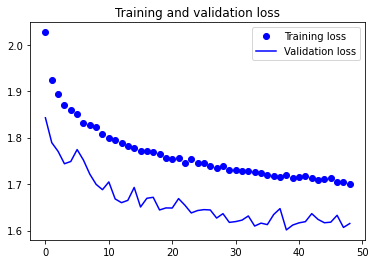

In [15]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()